## Web scraping and analysis

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

In [3]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re

from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
processed_df = pd.DataFrame()
processed_df["reviews"] = reviews

In [7]:
processed_df

,reviews
0,✅ Trip Verified | Despite boarding being the u...
1,"Not Verified | Flight cancelled, no crew! 9th..."
2,"Not Verified | The worst service ever, my bag..."
3,✅ Trip Verified | 4/4 flights we booked this ...
4,✅ Trip Verified | British Airways has a total...
...,...
995,✅ Trip Verified | London to Boston. I was sea...
996,✅ Trip Verified | Stockholm to London. Standar...
997,✅ Trip Verified | Amsterdam to London arrived...
998,✅ Trip Verified | Buenos Aires to London. We ...


In [8]:
# Initialize NLTK resources
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Download stop words data
nltk.download('vader_lexicon')  # Download vader_lexicon dat

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\INTELLECT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INTELLECT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\INTELLECT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# Removing Special characters, numbers and puntuactions
processed_df['reviewsNew'] = processed_df['reviews'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

In [10]:
processed_df['reviewsNew']

0        Trip Verified   Despite boarding being the u...
1      Not Verified    Flight cancelled  no crew   th...
2      Not Verified    The worst service ever  my bag...
3        Trip Verified        flights we booked this ...
4        Trip Verified    British Airways has a total...
                             ...                        
995      Trip Verified    London to Boston  I was sea...
996      Trip Verified   Stockholm to London  Standar...
997      Trip Verified    Amsterdam to London arrived...
998      Trip Verified    Buenos Aires to London  We ...
999      Trip Verified    Business Class space is rid...
Name: reviewsNew, Length: 1000, dtype: object

In [11]:
# Changing reviews to lowercase and split the sentances into individual words 
processed_df['reviewsNew'] = processed_df['reviewsNew'].apply(lambda x: word_tokenize(x.lower()))


In [12]:
processed_df['reviewsNew']

0      [trip, verified, despite, boarding, being, the...
1      [not, verified, flight, cancelled, no, crew, t...
2      [not, verified, the, worst, service, ever, my,...
3      [trip, verified, flights, we, booked, this, ho...
4      [trip, verified, british, airways, has, a, tot...
                             ...                        
995    [trip, verified, london, to, boston, i, was, s...
996    [trip, verified, stockholm, to, london, standa...
997    [trip, verified, amsterdam, to, london, arrive...
998    [trip, verified, buenos, aires, to, london, we...
999    [trip, verified, business, class, space, is, r...
Name: reviewsNew, Length: 1000, dtype: object

In [13]:
# Removing Stop Words
ps = PorterStemmer() # creating rootwords
stop_words = set(stopwords.words('english'))
processed_df['reviewsNew'] = processed_df['reviewsNew'].apply(lambda x: [ps.stem(word) for word in x if word not in stop_words])


In [14]:
processed_df['reviewsNew']

0      [trip, verifi, despit, board, usual, free, lhr...
1      [verifi, flight, cancel, crew, th, septemb, pe...
2      [verifi, worst, servic, ever, baggag, arriv, t...
3      [trip, verifi, flight, book, holiday, delay, h...
4      [trip, verifi, british, airway, total, lack, r...
                             ...                        
995    [trip, verifi, london, boston, seat, next, cus...
996    [trip, verifi, stockholm, london, standard, co...
997    [trip, verifi, amsterdam, london, arriv, minut...
998    [trip, verifi, bueno, air, london, flew, overn...
999    [trip, verifi, busi, class, space, ridicul, na...
Name: reviewsNew, Length: 1000, dtype: object

In [15]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
processed_df['Sentiment_Score'] = processed_df['reviewsNew'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])


In [16]:
processed_df

,reviews,reviewsNew,Sentiment_Score
0,✅ Trip Verified | Despite boarding being the u...,"[trip, verifi, despit, board, usual, free, lhr...",0.9508
1,"Not Verified | Flight cancelled, no crew! 9th...","[verifi, flight, cancel, crew, th, septemb, pe...",-0.7845
2,"Not Verified | The worst service ever, my bag...","[verifi, worst, servic, ever, baggag, arriv, t...",-0.8720
3,✅ Trip Verified | 4/4 flights we booked this ...,"[trip, verifi, flight, book, holiday, delay, h...",0.4404
4,✅ Trip Verified | British Airways has a total...,"[trip, verifi, british, airway, total, lack, r...",-0.3818
...,...,...,...
995,✅ Trip Verified | London to Boston. I was sea...,"[trip, verifi, london, boston, seat, next, cus...",0.9022
996,✅ Trip Verified | Stockholm to London. Standar...,"[trip, verifi, stockholm, london, standard, co...",0.9468
997,✅ Trip Verified | Amsterdam to London arrived...,"[trip, verifi, amsterdam, london, arriv, minut...",0.1779
998,✅ Trip Verified | Buenos Aires to London. We ...,"[trip, verifi, bueno, air, london, flew, overn...",0.1027


In [17]:
# Analysis and Visualization
sentiment_labels = []
for score in processed_df['Sentiment_Score']:
    if score > 0.05:
        sentiment_labels.append('Positive')
    elif score < -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

processed_df['Sentiment_Label'] = sentiment_labels


In [18]:
processed_df

,reviews,reviewsNew,Sentiment_Score,Sentiment_Label
0,✅ Trip Verified | Despite boarding being the u...,"[trip, verifi, despit, board, usual, free, lhr...",0.9508,Positive
1,"Not Verified | Flight cancelled, no crew! 9th...","[verifi, flight, cancel, crew, th, septemb, pe...",-0.7845,Negative
2,"Not Verified | The worst service ever, my bag...","[verifi, worst, servic, ever, baggag, arriv, t...",-0.8720,Negative
3,✅ Trip Verified | 4/4 flights we booked this ...,"[trip, verifi, flight, book, holiday, delay, h...",0.4404,Positive
4,✅ Trip Verified | British Airways has a total...,"[trip, verifi, british, airway, total, lack, r...",-0.3818,Negative
...,...,...,...,...
995,✅ Trip Verified | London to Boston. I was sea...,"[trip, verifi, london, boston, seat, next, cus...",0.9022,Positive
996,✅ Trip Verified | Stockholm to London. Standar...,"[trip, verifi, stockholm, london, standard, co...",0.9468,Positive
997,✅ Trip Verified | Amsterdam to London arrived...,"[trip, verifi, amsterdam, london, arriv, minut...",0.1779,Positive
998,✅ Trip Verified | Buenos Aires to London. We ...,"[trip, verifi, bueno, air, london, flew, overn...",0.1027,Positive


In [19]:
processed_df['Sentiment_Label'].value_counts()

Positive    597
Negative    368
Neutral      35
Name: Sentiment_Label, dtype: int64

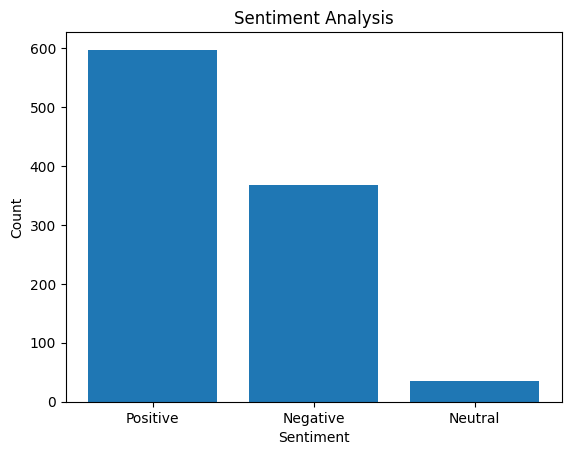

In [20]:
# Count sentiment labels
sentiment_counts = processed_df['Sentiment_Label'].value_counts()

# Visualization
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()


In [21]:

# Create a Dictionary and Corpus
dictionary = corpora.Dictionary(processed_df['reviewsNew'])
corpus = [dictionary.doc2bow(tokens) for tokens in processed_df['reviewsNew']]

In [22]:
# Train LDA Model
num_topics = 5  # You can adjust the number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print Topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.024*"flight" + 0.017*"ba" + 0.012*"seat" + 0.012*"verifi" + 0.010*"board"')
(1, '0.024*"flight" + 0.023*"seat" + 0.015*"trip" + 0.015*"verifi" + 0.012*"ba"')
(2, '0.034*"flight" + 0.018*"ba" + 0.013*"verifi" + 0.012*"hour" + 0.011*"trip"')
(3, '0.025*"flight" + 0.014*"refund" + 0.013*"ba" + 0.012*"travel" + 0.011*"cancel"')
(4, '0.018*"seat" + 0.010*"flight" + 0.007*"ba" + 0.006*"us" + 0.006*"book"')


In [23]:
# Visualize Topics
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

c:\Users\INTELLECT\anaconda3\envs\tf20_py30\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
